In [1]:
import pyart
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
import os

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%matplotlib inline

np.set_printoptions(suppress=True)


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 18
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

In [3]:
#Loading colormaps to use with the plots
cmap1=plt.cm.get_cmap('pyart_HomeyerRainbow',25)
cmap2=plt.cm.get_cmap('viridis',16)
cmap3=plt.cm.get_cmap('pyart_Theodore16',20)

In [4]:
date='20170619'

In [5]:
#This is the path for where the data is
basedir = '/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/'

#create a directory where you want to save your plots to
outdir = os.path.join('/home/users/marta_9/plots/',date)

#If the path doesnt exist then create it
if not os.path.exists(outdir):
    os.makedirs(outdir)



In [6]:
#This is the path for the sur directory, which is the PPI files    
surdir = os.path.join(basedir,'sur/',date)
sur_files = os.listdir(surdir)
#Puts the files in order
sur_files.sort()
#Prints out how many files there are
len(sur_files)

215

In [7]:
#This is the path for the RHI directory
rhidir = os.path.join(basedir,'rhi/',date)
rhi_files = os.listdir(rhidir)
rhi_files.sort()
len(rhi_files)

430

In [8]:

#Choose a sur(PPI) file
ff=68
surfile = os.path.join(surdir,sur_files[ff])
print(surfile)

/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/sur/20170619/ncas-mobile-x-band-radar-1_chilbolton_20170619-073614_SUR_v1.nc


In [9]:
#There are more RHI files than there are PPI files on each day 
rr=136
rhifile = os.path.join(rhidir,rhi_files[rr])
print(rhifile)

/gws/nopw/j04/ncas_radar_vol2/data/xband/chilbolton/cfradial/calib_v2/rhi/20170619/ncas-mobile-x-band-radar-1_chilbolton_20170619-073521_RHI_v1.nc


In [10]:
#Loads the PPI file into an object called "rad"
#delay_field_loading is something that quickens up this command, it's useful to include it
rad=pyart.io.read(surfile,delay_field_loading=True)

In [11]:
#Extract the variables you want from the rad object
dopvel=rad.fields['V']['data']
ZDR=rad.fields['ZDR']['data']
DBZ=rad.fields['dBZ']['data']
DBZV=rad.fields['dBZv']['data']

In [12]:
print(dopvel)
print(DBZ.shape)

[[-- -- 2.260629892349243 ... -- -- --]
 [-- -- 2.260629892349243 ... -- -- --]
 [-- -- -12.810235977172852 ... -- -- --]
 ...
 [-- -- -0.25118109583854675 ... -- -- --]
 [-- -- -0.5023621916770935 ... -- -- --]
 [-- -- -3.516535520553589 ... -- -- --]]
(3600, 1000)


In [13]:
#Elevation array
el=rad.elevation['data']
print('The shape of the elevation array is', el.shape)

print(el[2880:3240].shape)
#print(el[0:360])
#el=el[::360]
#print(el)

The shape of the elevation array is (3600,)
(360,)


In [14]:
#Elevation Array
#0 0.5 0:360
#1 1.0 361:720
#2 1.5 721:1080
#3 2.0 1081:1440

In [15]:
#Azimuth Array
azi=rad.azimuth['data']
print(azi.shape)
#print(azi[361:720])

(3600,)


In [17]:
#Range array
rg=rad.range['data']/1000
print(rg.shape)

(1000,)


In [18]:
#Create a display object from the rad object so you can make plots
display = pyart.graph.RadarDisplay(rad)

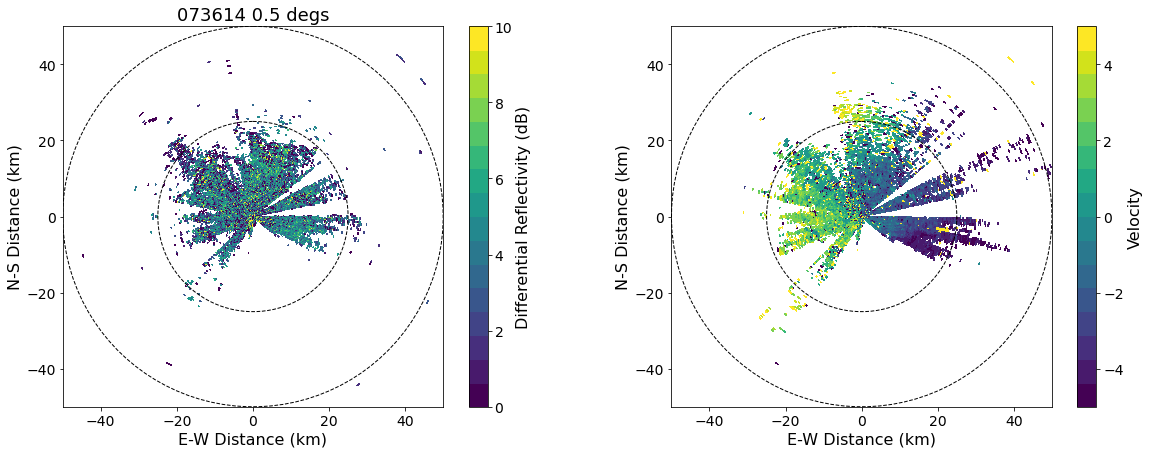

In [19]:
xlabel = 'E-W Distance (km)'
ylabel = 'N-S Distance (km)'
r=50

fig = plt.figure(figsize = (20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

i=0
E = str(rad.elevation['data'][360*i])
T = surfile[130:136]+' '+E+' degs'


#display.plot_ppi('dBZ', sweep = i, fig = fig, ax = ax1, vmin = -20, vmax = 20, cmap = cmap1,
#                title=T,axislabels=(xlabel, ylabel),colorbar_label='Reflectivity (dBZ)')
display.plot_ppi('ZDR', sweep = i, fig = fig, ax = ax1, vmin = 0, vmax = 10, cmap = cmap2,
                title=T,axislabels=(xlabel, ylabel),colorbar_label='Differential Reflectivity (dB)')
display.plot_ppi('V', sweep = i, fig = fig, ax = ax2, vmin = -5, vmax = 5, cmap = cmap2,
                title_flag=False,axislabels=(xlabel, ylabel),colorbar_label='Velocity')

for ax in [ax1,ax2]:

    ax.set_xlim([-r,r])
    ax.set_ylim([-r,r])
    ax.set_aspect('equal')
    display.plot_range_rings([25,50], ax=ax, col='k',ls='--',lw=1)

    
#filename='sur_'+surfile[121:129]+'_'+surfile[130:134]+'_dbz_zdr_swp'+str(swp)+'.png'    
#fig.set_facecolor('white')
#plt.tight_layout()
#plt.savefig(os.path.join(outdir,filename),dpi=150)    

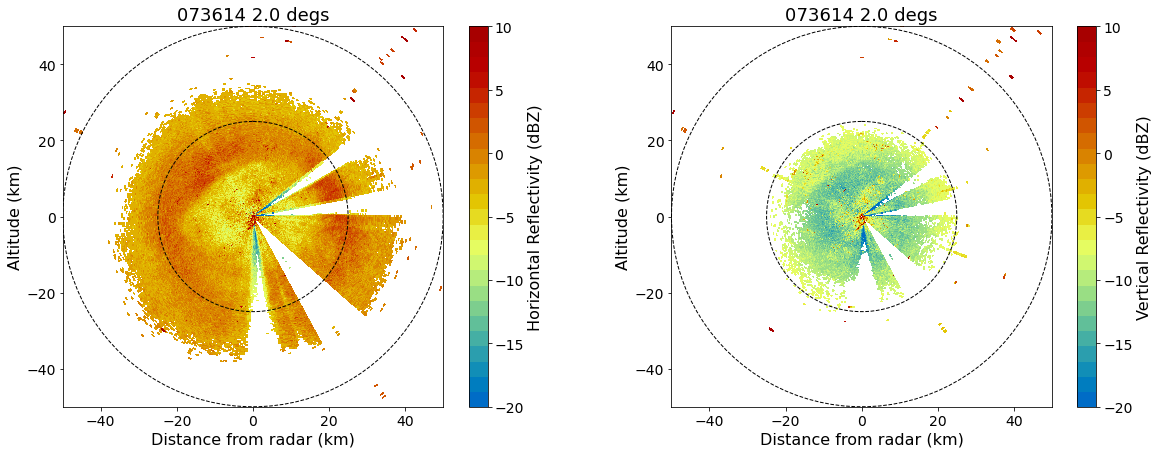

In [24]:
i=3
E = str(rad.elevation['data'][360*i])
T = surfile[130:136]+' '+E+' degs'
r=50

fig = plt.figure(figsize = (20,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
display.plot_ppi('dBZ', sweep = i, fig = fig, ax = ax1, vmin = -20, vmax = 10, cmap = cmap1,
                title=T,axislabels=(xlabel, ylabel),colorbar_label='Horizontal Reflectivity (dBZ)')
display.plot_ppi('dBZv', sweep = i, fig = fig, ax = ax2, vmin = -20, vmax = 10, cmap = cmap1,
                title=T,axislabels=(xlabel, ylabel),colorbar_label='Vertical Reflectivity (dBZ)')

for ax in [ax1,ax2]:
       
        ax.set_xlim([-r,r])
        ax.set_ylim([-r,r])
        ax.set_aspect('equal')
        display.plot_range_rings([25,50], ax=ax, col='k',ls='--',lw=1)

In [20]:
#Create a display object for the RHI file
radrhi=pyart.io.read(rhifile)
rhidisplay = pyart.graph.RadarDisplay(radrhi)

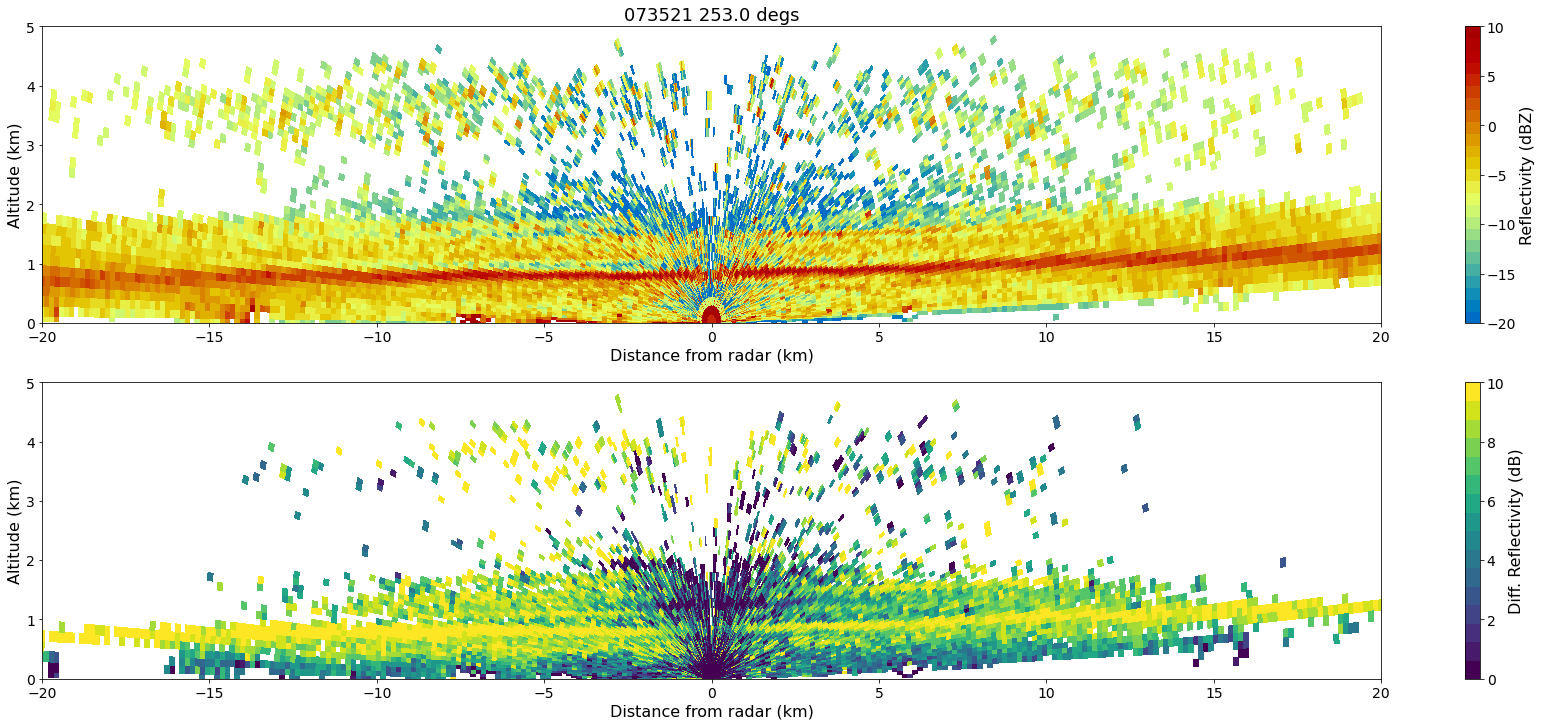

In [21]:
A = str(radrhi.azimuth['data'][0])
T = rhifile[130:136]+ ' ' + A+ ' degs'
xlabel = 'Distance from radar (km)'
ylabel = 'Altitude (km)'

fig = plt.figure(figsize=(30,12))
# Create axes in figure
ax1 = fig.add_subplot(211)
rhidisplay.plot_rhi('dBZ', 0, vmin=-20, vmax=10.,title=T,colorbar_label='Reflectivity (dBZ)',
                   axislabels=(xlabel, ylabel), cmap = cmap1)
display.set_limits(ylim=[0, 5], xlim=[-20,20])

ax2 = fig.add_subplot(212)
rhidisplay.plot_rhi('ZDR', 0, vmin=0, vmax=10.,title_flag=False,colorbar_label='Diff. Reflectivity (dB)',
                   axislabels=(xlabel, ylabel), cmap = cmap2)
display.set_limits(ylim=[0, 5], xlim=[-20,20])

#filename='rhi_'+rhifile[121:129]+'_'+rhifile[130:134]+'_dbz_zdr.png'
#print(filename)
#fig.set_facecolor('white')
#plt.tight_layout()
#plt.savefig(os.path.join(outdir,filename),dpi=150)    

In [22]:
hgts=np.linspace(0, 2000, 50)
vad=pyart.retrieve.velocity_azimuth_display(rad, vel_field='V',z_want=hgts)

max height 2631.0 meters
max height 3938.0 meters
max height 5246.0 meters
max height 6553.0 meters
max height 9164.0 meters
max height 13076.0 meters
max height 16977.0 meters
max height 20866.0 meters
max height 27313.0 meters
max height 52438.0 meters


Text(0.5, 1.0, 'VAD, u=blue, v=red')

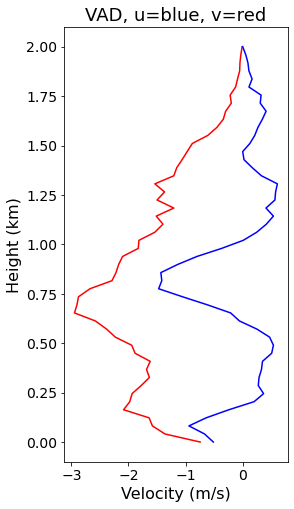

In [23]:
f=plt.figure(figsize=(4,8))
#plt.subplot(1,2,1)
plt.plot(vad.u_wind, vad.height/1000.0, 'r-')
plt.plot(vad.v_wind, vad.height/1000.0, 'b-')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Height (km)')
plt.title('VAD, u=blue, v=red')

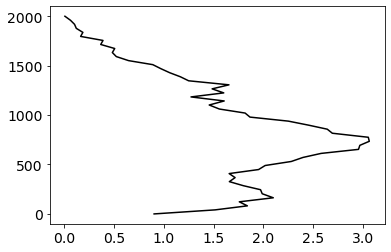

In [24]:
plt.plot(vad.speed,vad.height,'k-')

In [25]:
#Find a range corresponding to a given elevation angle and height above ground (using simple trigonometry!)
my_elevation=1.5
my_height=0.5
#what range is that?

my_range=my_height/np.sin(my_elevation*np.pi/180)
print(my_range)

rg_index=np.where(np.abs(my_range-rg)==np.min(np.abs(my_range-rg)))[0][0]
print(rg_index)
print(rg[rg_index])


19.100775007055226
127
19.125


In [21]:
#Choose your own range
my_range=10
rg_index=np.where(np.abs(my_range-rg)==np.min(np.abs(my_range-rg)))[0][0]
print(rg_index)
print(rg[rg_index])


66
9.975


Text(0, 0.5, 'ZDR')

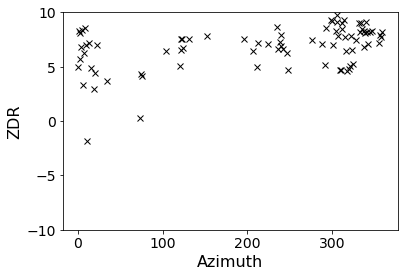

In [26]:
#Plot third elevation i.e. 1.5 degrees
plt.plot(azi[721:1080],ZDR[721:1080,rg_index],'kx')
plt.ylim(-10, 10)
plt.xlabel('Azimuth')
plt.ylabel('ZDR')